In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load AOI predictions

In [2]:
aoi = pd.read_csv('aoi_predictions.csv')
aoi

,Unnamed: 0,agency,agency_short,tag,course,rating,comment,clean_comment,tokenized,no_stopwords,lemmatized,body_len,vader,aoi
0,0,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID5: Boost Your Data Visualisations,4,Good,Good,['good'],['good'],['good'],4,0.4404,n
1,1,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL4: How Technology has Improved the Workplace,4,Ok,Ok,['ok'],['ok'],['ok'],2,0.2960,n
2,2,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,4,Useful.,Useful,['useful'],['useful'],['useful'],7,0.4404,n
3,3,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,"Ok,good.",Okgood,['okgood'],['okgood'],['okgood'],8,0.0000,n
4,4,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID4: Presenting and Interpreting Data,4,Good,Good,['good'],['good'],['good'],4,0.4404,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23334,23334,Temasek Polytechnic,TP,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,Clear & concise,Clear concise,"['clear', 'concise']","['clear', 'concise']","['clear', 'concise']",13,0.3818,n
23335,23335,Maritime And Port Authority Of Singapore,MPA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL3: Digital Tools that Support My Work,4,I am more of a daily operational officer. I do...,I am more of a daily operational officer I don...,"['i', 'am', 'more', 'of', 'a', 'daily', 'opera...","['daily', 'operational', 'officer', 'dont', 'i...","['daily', 'operational', 'officer', 'dont', 'i...",164,0.6369,n
23336,23336,Maritime And Port Authority Of Singapore,MPA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,3,Haven't seen enough to review.,Havent seen enough to review,"['havent', 'seen', 'enough', 'to', 'review']","['havent', 'seen', 'enough', 'review']","['havent', 'seen', 'enough', 'review']",26,0.0000,y
23337,23337,Ministry Of Education,MOE,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL3: Digital Tools that Support My Work,5,Good,Good,['good'],['good'],['good'],4,0.4404,n


# Load topic predictions

In [3]:
topic = pd.read_csv('topic_predictions.csv')
topic

,Unnamed: 0,agency,agency_short,tag,course,rating,comment,clean_comment,tokenized,no_stopwords,lemmatized,topic
0,0,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID5: Boost Your Data Visualisations,4,Good,Good,['good'],['good'],['good'],c
1,1,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL4: How Technology has Improved the Workplace,4,Ok,Ok,['ok'],['ok'],['ok'],d
2,2,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,4,Useful.,Useful,['useful'],['useful'],['useful'],c
3,3,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,"Ok,good.",Okgood,['okgood'],['okgood'],['okgood'],d
4,4,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID4: Presenting and Interpreting Data,4,Good,Good,['good'],['good'],['good'],c
...,...,...,...,...,...,...,...,...,...,...,...,...
23334,23334,Temasek Polytechnic,TP,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,Clear & concise,Clear concise,"['clear', 'concise']","['clear', 'concise']","['clear', 'concise']",d
23335,23335,Maritime And Port Authority Of Singapore,MPA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL3: Digital Tools that Support My Work,4,I am more of a daily operational officer. I do...,I am more of a daily operational officer I don...,"['i', 'am', 'more', 'of', 'a', 'daily', 'opera...","['daily', 'operational', 'officer', 'dont', 'i...","['daily', 'operational', 'officer', 'dont', 'i...",c
23336,23336,Maritime And Port Authority Of Singapore,MPA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,3,Haven't seen enough to review.,Havent seen enough to review,"['havent', 'seen', 'enough', 'to', 'review']","['havent', 'seen', 'enough', 'review']","['havent', 'seen', 'enough', 'review']",d
23337,23337,Ministry Of Education,MOE,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL3: Digital Tools that Support My Work,5,Good,Good,['good'],['good'],['good'],c


# Combine data together

In [4]:
data = aoi
data['topic'] = topic['topic']
data.drop(data.columns[0], axis = 1,inplace=True)
data.head()

,agency,agency_short,tag,course,rating,comment,clean_comment,tokenized,no_stopwords,lemmatized,body_len,vader,aoi,topic
0,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID5: Boost Your Data Visualisations,4,Good,Good,['good'],['good'],['good'],4,0.4404,n,c
1,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL4: How Technology has Improved the Workplace,4,Ok,Ok,['ok'],['ok'],['ok'],2,0.2960,n,d
2,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,4,Useful.,Useful,['useful'],['useful'],['useful'],7,0.4404,n,c
3,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,"Ok,good.",Okgood,['okgood'],['okgood'],['okgood'],8,0.0000,n,d
4,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID4: Presenting and Interpreting Data,4,Good,Good,['good'],['good'],['good'],4,0.4404,n,c


In [5]:
# remove words that contain less than 5 characters
# e.g. good, NIL
data = data[data.comment.apply(lambda x: len(str(x))>4)]

In [66]:
# make a deep copy to save final predictions
# a deep copy will not affect original copy
data2 = data.copy(deep=True)

In [67]:
# remove columns not needed anymore
data2.drop(columns=['clean_comment', 'tokenized', 'no_stopwords', 'lemmatized', 'body_len', 'vader'],inplace=True)
data2

C:\Users\Boon Kong\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,agency,agency_short,tag,course,rating,comment,aoi,topic
2,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,4,Useful.,n,c
3,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,"Ok,good.",n,d
11,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,Informative,n,c
18,Ministry of Defence,MINDEF,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL1: Why is Digital Transformation Important?,3,Good.,n,c
21,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,Understand better in cyber security,n,c
...,...,...,...,...,...,...,...,...
23333,Temasek Polytechnic,TP,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,The infographics when expanded is blurry,y,t
23334,Temasek Polytechnic,TP,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,Clear & concise,n,d
23335,Maritime And Port Authority Of Singapore,MPA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL3: Digital Tools that Support My Work,4,I am more of a daily operational officer. I do...,n,c
23336,Maritime And Port Authority Of Singapore,MPA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,3,Haven't seen enough to review.,y,d


In [68]:
# save finalised predictions to csv file
data2.to_csv('final_predictions.csv')

# No. of areas of improvement

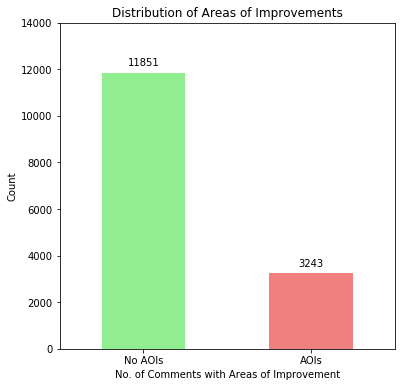

In [69]:
ax = data.aoi.value_counts().plot(kind='bar', title='Distribution of Areas of Improvements', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Comments with Areas of Improvement")
plt.ylabel("Count")
plt.ylim(top=14000)
plt.rcParams['figure.figsize'] = (3,4)

group_labels = ['No AOIs', 'AOIs']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('aoi_distribution.png', bbox_inches = "tight")

# AOI for each topic

In [32]:
cross1 = pd.crosstab(data['aoi'],data['topic'])
cross2 = cross1.transpose()
cross2

aoi,n,y
topic,,
c,9807,775
d,1984,1666
t,60,802


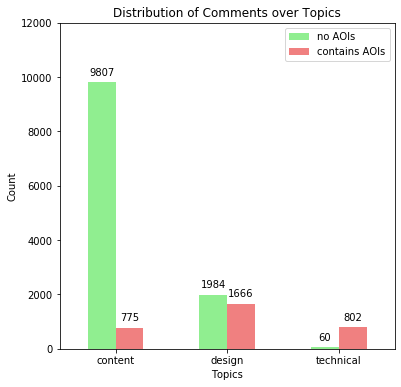

In [36]:
ax = cross2.plot(kind='bar', title='Distribution of Comments over Topics', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.ylim(top=12000)
plt.rcParams['figure.figsize'] = (3,6)

group_labels = ['content', 'design', 'technical']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('topic_distribution.png')

# Across agency short

In [39]:
group2 = data.groupby(['agency_short']).mean()
group2

,rating
agency_short,
ACRA,3.925373
AGC,3.944444
AGO,4.142857
ASTAR,3.250000
BCA,4.081633
...,...
SUPCOURT,4.037383
TOTEBOARD,4.200000
TP,4.074286


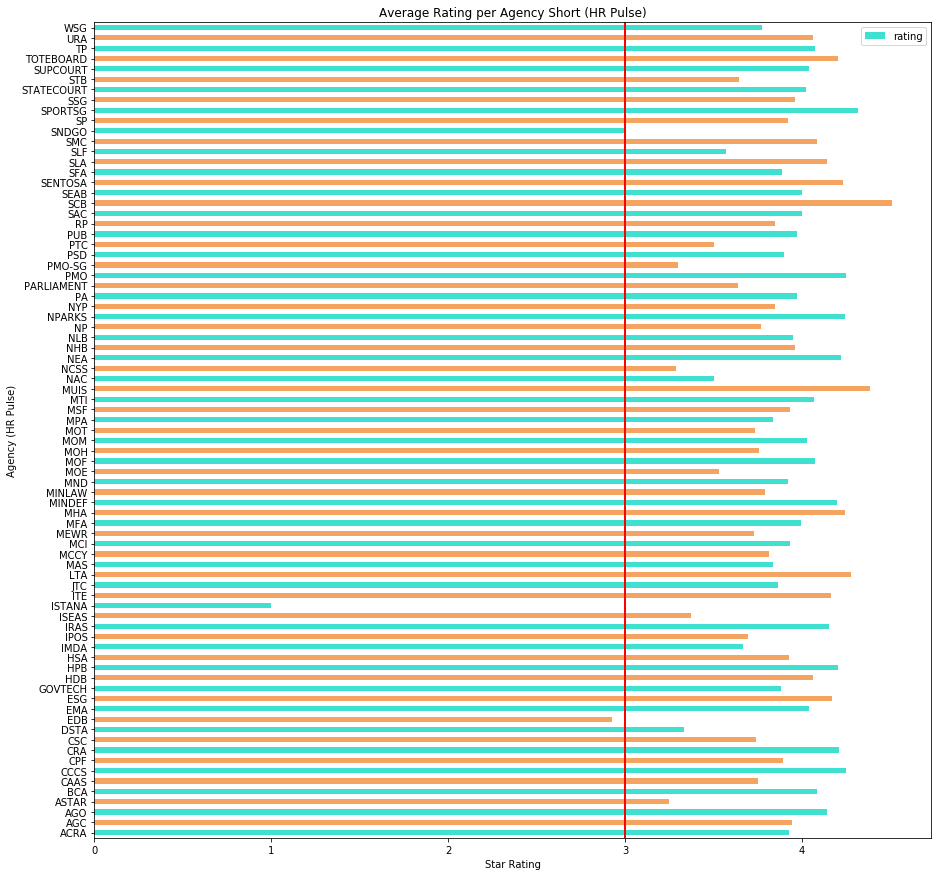

In [41]:
group2.reset_index().plot(
    x="agency_short", y='rating', kind="barh",
    color= ['turquoise', 'sandybrown']
)
plt.title('Average Rating per Agency Short (HR Pulse)')
plt.xlabel("Star Rating")
plt.ylabel("Agency (HR Pulse)")
plt.rcParams['figure.figsize'] = (15,15)
plt.axvline(x=3, linewidth=2, color='r')
plt.savefig('agency_short_rating.png')

# Star Counts

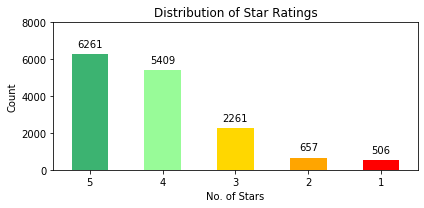

In [45]:
# take note, this is after dropping comments with less than 5 characters
# does not represent full dataset

ax = data.rating.value_counts().plot(kind='bar', title='Distribution of Star Ratings', color=['mediumseagreen', 'palegreen', 'gold', 'orange', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Stars")
plt.ylabel("Count")
plt.ylim(top=8000)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['5', '4', '3', '2', '1']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('star_distribution.png')

# Create sentiments

In [46]:
data["sentiment"] = np.nan

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
def label_sentiment(row):
    if row['rating'] > 3:
        return 'pos'
    elif row['rating'] == 3:
        return 'neu'
    else:
        return 'neg'

In [48]:
data['sentiment'] = data.apply (lambda row: label_sentiment(row), axis=1)
data.head()

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,agency,agency_short,tag,course,rating,comment,aoi,topic,sentiment
2,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,4,Useful.,n,c,pos
3,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,"Ok,good.",n,d,pos
11,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,Informative,n,c,pos
18,Ministry of Defence,MINDEF,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL1: Why is Digital Transformation Important?,3,Good.,n,c,neu
21,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,Understand better in cyber security,n,c,pos


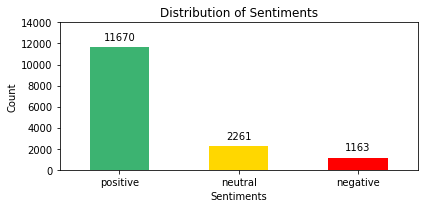

In [53]:
ax = data.sentiment.value_counts().plot(kind='bar', title='Distribution of Sentiments', color=['mediumseagreen', 'gold', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=14000)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['positive', 'neutral', 'negative']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('sentiment_distribution.png')

# AOI vs Sentiment

In [54]:
cross3 = pd.crosstab(data['aoi'],data['sentiment'])
cross4 = cross3.transpose()
cross5 = cross4[::-1] 
cross5

aoi,n,y
sentiment,,
pos,10110,1560
neu,1451,810
neg,290,873


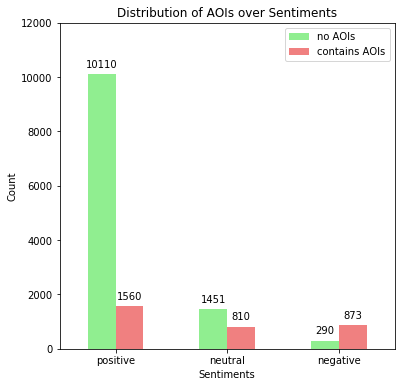

In [58]:
ax = cross5.plot(kind='bar', title='Distribution of AOIs over Sentiments', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=12000)
plt.rcParams['figure.figsize'] = (6,6)

group_labels = ['positive','neutral','negative']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('sentiment_vs_aoi_distribution.png')

# Individual pathway analysis

- find common words within each topic

In [6]:
# drop irrelevant columns to make it neater
data.drop(columns=['agency','agency_short','tag','clean_comment','tokenized','no_stopwords','body_len','vader'],inplace=True)

# 1. Communication & Collaboration

In [7]:
cc = data[data.course.str.contains("BDLCC")]
cc.head()

,course,rating,comment,lemmatized,aoi,topic
27,BDLCC1: Communicate & Collaborate with the Rig...,5,good,['good'],n,c
29,BDLCC1: Communicate & Collaborate with the Rig...,1,Cant understand alot,"['cant', 'understand', 'alot']",y,c
30,BDLCC1: Communicate & Collaborate with the Rig...,1,Good,['good'],n,c
44,BDLCC2: Communicate & Collaborate with Etiquette,5,The first part seems to have an error on the f...,"['first', 'part', 'seems', 'error', 'flip', 'c...",y,d
45,BDLCC1: Communicate & Collaborate with the Rig...,5,Informative and concise,"['informative', 'concise']",n,d


In [9]:
from collections import Counter

### common words for content

In [15]:
content = cc[cc['topic'] == 'c']
content = content[content['aoi'] == 'y']
content.head()

,course,rating,comment,lemmatized,aoi,topic
29,BDLCC1: Communicate & Collaborate with the Right Tools,1,Cant understand alot,"['cant', 'understand', 'alot']",y,c
447,BDLCC1: Communicate & Collaborate with the Right Tools,3,basic information,"['basic', 'information']",y,c
544,BDLCC1: Communicate & Collaborate with the Right Tools,5,The correct method of communication.,"['correct', 'method', 'communication']",y,c
621,BDLCC3: Communicate & Collaborate with Agility,3,To improvee on communicate with agility,"['improvee', 'communicate', 'agility']",y,c
1146,BDLCC3: Communicate & Collaborate with Agility,5,How to communicate with people using tools,"['communicate', 'people', 'using', 'tool']",y,c


In [27]:
Counter(" ".join(content["lemmatized"].str.lower()).split()).most_common(15)

[("'']", 29),
 ("'scrum',", 8),
 ("['scrum',", 7),
 ("['learnt',", 7),
 ("'work',", 6),
 ("'use',", 5),
 ("'right',", 5),
 ("'working',", 5),
 ("'tool']", 4),
 ("['quite',", 4),
 ("'given',", 4),
 ("'example',", 4),
 ("'principle',", 4),
 ("'get',", 4),
 ("['relevant',", 4)]

In [28]:
pd.set_option('display.max_colwidth', -1)
list1 = content[content['lemmatized'].str.contains('relevant')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
7746,BDLCC2: Communicate & Collaborate with Etiquette,1,not relevant,"['relevant', '']",y,c
8137,BDLCC3: Communicate & Collaborate with Agility,1,There is no explanation as to what is Scrum and how it is applicable. Very confusing unit that is not relevant.,"['explanation', 'scrum', 'applicable', 'confusing', 'unit', 'relevant']",y,c
8923,BDLCC2: Communicate & Collaborate with Etiquette,4,Relevant,"['relevant', '']",y,c
9198,BDLCC1: Communicate & Collaborate with the Right Tools,5,Highly relevant,"['highly', 'relevant']",y,c
9845,BDLCC2: Communicate & Collaborate with Etiquette,4,Are these relevant to stat boards as well?,"['relevant', 'stat', 'board', 'well']",y,c
13700,BDLCC1: Communicate & Collaborate with the Right Tools,2,Quite relevant.,"['quite', 'relevant']",y,c
17172,BDLCC1: Communicate & Collaborate with the Right Tools,5,Very relevant to me,"['relevant', '']",y,c
17417,BDLCC1: Communicate & Collaborate with the Right Tools,1,The materials are mostly not relevant for officers from educational institutions which have not undergone Internet Surfing Separation. These officers are unable to access the tools from their official devices as they are issued devices with GSIB.,"['material', 'mostly', 'relevant', 'officer', 'educational', 'institution', 'undergone', 'internet', 'surfing', 'separation', 'officer', 'unable', 'access', 'tool', 'official', 'device', 'issued', 'device', 'gsib', '']",y,c


### common words for design

In [29]:
design = cc[cc['topic'] == 'd']
design = design[design['aoi'] == 'y']
design.head()

,course,rating,comment,lemmatized,aoi,topic
44,BDLCC2: Communicate & Collaborate with Etiquette,5,The first part seems to have an error on the flip cards. Some of the pointers are jumbled up,"['first', 'part', 'seems', 'error', 'flip', 'card', 'pointer', 'jumbled']",y,d
244,BDLCC2: Communicate & Collaborate with Etiquette,4,Able to demo appropriate etiquette on different platforms.,"['able', 'demo', 'appropriate', 'etiquette', 'different', 'platform']",y,d
492,BDLCC2: Communicate & Collaborate with Etiquette,4,Well taught. Everything in detail,"['well', 'taught', 'everything', 'detail']",y,d
585,BDLCC2: Communicate & Collaborate with Etiquette,4,Konwledable,"['konwledable', '']",y,d
628,BDLCC2: Communicate & Collaborate with Etiquette,4,Taight me how to useskymerting,"['taight', 'useskymerting']",y,d


In [37]:
Counter(" ".join(design["lemmatized"].str.lower()).split()).most_common(10)

[("'']", 46),
 ("'course',", 12),
 ("'team',", 11),
 ("'tool',", 11),
 ("'work',", 10),
 ("'card',", 9),
 ("['good',", 9),
 ("'personal',", 9),
 ("'need',", 9),
 ("'time',", 8)]

In [38]:
pd.set_option('display.max_colwidth', -1)
list1 = design[design['lemmatized'].str.contains('time')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
2135,BDLCC3: Communicate & Collaborate with Agility,4,All about time work,"['time', 'work', '']",y,d
7863,BDLCC2: Communicate & Collaborate with Etiquette,1,Extremely irrelevant for officers already in service. CSC should have better curation for course content that requires all public officers to go through so that time is not wasted,"['extremely', 'irrelevant', 'officer', 'already', 'service', 'csc', 'better', 'curation', 'course', 'content', 'requires', 'public', 'officer', 'go', 'time', 'wasted']",y,d
7977,BDLCC1: Communicate & Collaborate with the Right Tools,3,The content is fine but sometimes it's frozen and need to exit the app and re-enter again. It happened a few times.,"['content', 'fine', 'sometimes', 'frozen', 'need', 'exit', 'app', 'reenter', 'happened', 'time']",y,d
10580,BDLCC1: Communicate & Collaborate with the Right Tools,4,Time for learning is fine.,"['time', 'learning', 'fine', '']",y,d
16542,BDLCC3: Communicate & Collaborate with Agility,2,"It's a good introduction to PM techniques, but the reality is that PS working environments cannot support these methods. Especially when stakeholders enforce kneejerk responses all the time.","['good', 'introduction', 'pm', 'technique', 'reality', 'p', 'working', 'environment', 'cannot', 'support', 'method', 'especially', 'stakeholder', 'enforce', 'kneejerk', 'response', 'time']",y,d
16650,BDLCC3: Communicate & Collaborate with Agility,1,"We need to be Paid Additional for doing this Course on Our Data Usage, Equipment and Personal Time. Please keep Our Personal and Work Life Separate.","['need', 'paid', 'additional', 'course', 'data', 'usage', 'equipment', 'personal', 'time', 'please', 'keep', 'personal', 'work', 'life', 'separate']",y,d
16651,BDLCC2: Communicate & Collaborate with Etiquette,1,"We need to be Paid Additional for doing this Course on Our Data Usage, Equipment and Personal Time. Please keep Our Personal and Work Life Separate.","['need', 'paid', 'additional', 'course', 'data', 'usage', 'equipment', 'personal', 'time', 'please', 'keep', 'personal', 'work', 'life', 'separate']",y,d
16652,BDLCC1: Communicate & Collaborate with the Right Tools,1,"We need to be Paid Additional for doing this Course on Our Data Usage, Equipment and Personal Time. Please keep Our Personal and Work Life Separate.","['need', 'paid', 'additional', 'course', 'data', 'usage', 'equipment', 'personal', 'time', 'please', 'keep', 'personal', 'work', 'life', 'separate']",y,d
16795,BDLCC3: Communicate & Collaborate with Agility,4,"Hm, this doesn’t really seem to reflect projects in my agency as eg there are many new demands placed on the team at any time","['hm', 'really', 'seem', 'reflect', 'project', 'agency', 'eg', 'many', 'new', 'demand', 'placed', 'team', 'time', '']",y,d
16881,BDLCC3: Communicate & Collaborate with Agility,3,"As indicated in the early slide, these slides assumes that all team members are highly motivated and cooperative. In truth, this is not always the case, especially when often times we cannot choose who is in the team we lead","['indicated', 'early', 'slide', 'slide', 'assumes', 'team', 'member', 'highly', 'motivated', 'cooperative', 'truth', 'always', 'case', 'especially', 'often', 'time', 'cannot', 'choose', 'team', 'lead']",y,d


### common words for technical

In [39]:
technical = cc[cc['topic'] == 't']
technical = technical[technical['aoi'] == 'y']
technical.head()

,course,rating,comment,lemmatized,aoi,topic
243,BDLCC3: Communicate & Collaborate with Agility,4,Able to demo adaptability and agility when working digitally with other.,"['able', 'demo', 'adaptability', 'agility', 'working', 'digitally']",y,t
800,BDLCC2: Communicate & Collaborate with Etiquette,1,Unable to see content,"['unable', 'see', 'content']",y,t
1437,BDLCC1: Communicate & Collaborate with the Right Tools,3,I am not able to view the full page on my iPad.\nThe page numbers didn’t seem correct also.\n,"['able', 'view', 'full', 'page', 'ipad', 'page', 'number', 'seem', 'correct', 'also', '']",y,t
3737,BDLCC3: Communicate & Collaborate with Agility,4,Pages 9 to 11 couldn't load.,"['page', '9', '11', 'couldnt', 'load']",y,t
4007,BDLCC3: Communicate & Collaborate with Agility,2,Pgs 8 to 10 could not load.,"['pgs', '8', '10', 'could', 'load']",y,t


In [44]:
Counter(" ".join(technical["lemmatized"].str.lower()).split()).most_common(10)

[("'']", 25),
 ("'page',", 9),
 ("'user',", 7),
 ("'course',", 6),
 ("'complete',", 5),
 ("['slow',", 5),
 ("'interface',", 5),
 ("'load']", 4),
 ("'slow']", 4),
 ("'see',", 3)]

In [50]:
pd.set_option('display.max_colwidth', -1)
list1 = technical[technical['lemmatized'].str.contains('load')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
3737,BDLCC3: Communicate & Collaborate with Agility,4,Pages 9 to 11 couldn't load.,"['page', '9', '11', 'couldnt', 'load']",y,t
4007,BDLCC3: Communicate & Collaborate with Agility,2,Pgs 8 to 10 could not load.,"['pgs', '8', '10', 'could', 'load']",y,t
6387,BDLCC3: Communicate & Collaborate with Agility,1,I have done Core Module 3 numerous times because it either hangs or doesn’t load the next/final page. Is there an option to complete these modules on either a website or sit through a physical training? Otherwise please improve this app.,"['done', 'core', 'module', '3', 'numerous', 'time', 'either', 'hang', 'load', 'nextfinal', 'page', 'option', 'complete', 'module', 'either', 'website', 'sit', 'physical', 'training', 'otherwise', 'please', 'improve', 'app', '']",y,t
7114,BDLCC1: Communicate & Collaborate with the Right Tools,4,Loading of quizz questions can be faster,"['loading', 'quizz', 'question', 'faster']",y,t
8345,BDLCC1: Communicate & Collaborate with the Right Tools,5,Loading is very slow,"['loading', 'slow']",y,t
8934,BDLCC2: Communicate & Collaborate with Etiquette,3,Loading is slow,"['loading', 'slow']",y,t
10283,BDLCC2: Communicate & Collaborate with Etiquette,3,Took multiple attempts to load.,"['took', 'multiple', 'attempt', 'load']",y,t
13693,BDLCC3: Communicate & Collaborate with Agility,4,Slow loading,"['slow', 'loading', '']",y,t
16739,BDLCC2: Communicate & Collaborate with Etiquette,3,His module is ok. Module 1 SCORN does not load properly,"['module', 'ok', 'module', '1', 'scorn', 'load', 'properly']",y,t
20135,BDLCC2: Communicate & Collaborate with Etiquette,1,Button did not load,"['button', 'load']",y,t


# 2. Cyber & Data Security

In [53]:
cd = data[data.course.str.contains("BDLCD")]

### content

In [52]:
content = cd[cd['topic'] == 'c']
content = content[content['aoi'] == 'y']
content.head()

,course,rating,comment,lemmatized,aoi,topic
50,BDLCD1: Cyber Security,5,Everyone need to know about it.\n,"['everyone', 'need', 'know', '']",y,c
65,BDLCD2: Data Security,5,Will apply at work all the time.,"['apply', 'work', 'time']",y,c
235,BDLCD2: Data Security,4,Tough remembering,"['tough', 'remembering', '']",y,c
423,BDLCD1: Cyber Security,5,Quiet intresting and knowlegeable especially with new era and technologies developing very fsst. We need to prepate ourself from becoming a victim.,"['quiet', 'intresting', 'knowlegeable', 'especially', 'new', 'era', 'technology', 'developing', 'fsst', 'need', 'prepate', 'ourself', 'becoming', 'victim', '']",y,c
675,BDLCD2: Data Security,4,Require more understanding in the topics,"['require', 'understanding', 'topic']",y,c


In [54]:
Counter(" ".join(content["lemmatized"].str.lower()).split()).most_common(15)

[("'']", 16),
 ("'need',", 4),
 ("'cyber',", 4),
 ("'classification',", 4),
 ("'data',", 4),
 ("['data',", 3),
 ("'complicated',", 3),
 ("'information',", 3),
 ("'using',", 3),
 ("'computer',", 3),
 ("'ourself',", 2),
 ("'understanding',", 2),
 ("['quite',", 2),
 ("'provide',", 2),
 ("'u',", 2)]

In [99]:
pd.set_option('display.max_colwidth', -1)
list1 = content[content['lemmatized'].str.contains('computer')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
13721,BDLID3: Introduction to Information Literacy & Data Interpretation,4,Now I am more organise in computers data,"['organise', 'computer', 'data']",y,c


### design

In [68]:
design = cd[cd['topic'] == 'd']
design = design[design['aoi'] == 'y']
design.head()

,course,rating,comment,lemmatized,aoi,topic
37,BDLCD2: Data Security,4,To enhance on the font color due to the background are both light tone. Thanks 😊,"['enhance', 'font', 'color', 'due', 'background', 'light', 'tone', 'thanks', '']",y,d
70,BDLCD1: Cyber Security,4,Very detailed tks,"['detailed', 'tks']",y,d
85,BDLCD1: Cyber Security,4,Pls provide captions in videos to facilitate hearing impairment users,"['pls', 'provide', 'caption', 'video', 'facilitate', 'hearing', 'impairment', 'user']",y,d
103,BDLCD1: Cyber Security,1,Lengthy wordy,"['lengthy', 'wordy']",y,d
104,BDLCD2: Data Security,2,Too many reading \n,"['many', 'reading', '']",y,d


In [80]:
Counter(" ".join(design["lemmatized"].str.lower()).split()).most_common(15)

[("'']", 30),
 ("'video',", 13),
 ("'lesson',", 6),
 ("'question',", 5),
 ("'time']", 5),
 ("['lengthy',", 4),
 ("'would',", 4),
 ("['good',", 4),
 ("'need',", 4),
 ("['detailed',", 3),
 ("'caption',", 3),
 ("'hearing',", 3),
 ("['lengthy']", 3),
 ("['course',", 3),
 ("'lengthy',", 3)]

In [81]:
pd.set_option('display.max_colwidth', -1)
list1 = design[design['lemmatized'].str.contains('caption')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
85,BDLCD1: Cyber Security,4,Pls provide captions in videos to facilitate hearing impairment users,"['pls', 'provide', 'caption', 'video', 'facilitate', 'hearing', 'impairment', 'user']",y,d
782,BDLCD1: Cyber Security,1,no captions on videos for people with hearing condition,"['caption', 'video', 'people', 'hearing', 'condition']",y,d
2044,BDLCD1: Cyber Security,4,You should close caption the videos so that trainees who gave hearing problems can understand the lesson. Will also help if trainee is watching videos in a noisy environment.,"['close', 'caption', 'video', 'trainee', 'gave', 'hearing', 'problem', 'understand', 'lesson', 'also', 'help', 'trainee', 'watching', 'video', 'noisy', 'environment', '']",y,d
3726,BDLCD1: Cyber Security,4,Would have given 5 stars if there were captions in the videos which would have made delivery of the content even more accessible.,"['would', 'given', '5', 'star', 'caption', 'video', 'would', 'made', 'delivery', 'content', 'even', 'accessible']",y,d


### technical

In [77]:
technical = cd[cd['topic'] == 't']
technical = technical[technical['aoi'] == 'y']
technical.head()

,course,rating,comment,lemmatized,aoi,topic
90,BDLCD2: Data Security,3,Should have system in built text broadcast whenever staff use the laptop,"['system', 'built', 'text', 'broadcast', 'whenever', 'staff', 'use', 'laptop', '']",y,t
116,BDLCD1: Cyber Security,2,Some of the videos cannot be played. Hope it can be rectified soon. Thanks.,"['video', 'cannot', 'played', 'hope', 'rectified', 'soon', 'thanks', '']",y,t
117,BDLCD2: Data Security,1,difficult,['difficult'],y,t
183,BDLCD2: Data Security,1,"Not user friendly. Videos on how to right classify/sensitivity of data stream too fast - need time to process info. When you pause, it cannot play again. Need to come back in again.","['user', 'friendly', 'video', 'right', 'classifysensitivity', 'data', 'stream', 'fast', 'need', 'time', 'process', 'info', 'pause', 'cannot', 'play', 'need', 'come', 'back']",y,t
526,BDLCD1: Cyber Security,5,Good. When play video on hp it always hang every few second. Not sure why. Very disruptive,"['good', 'play', 'video', 'hp', 'always', 'hang', 'every', 'second', 'sure', 'disruptive']",y,t


In [79]:
Counter(" ".join(technical["lemmatized"].str.lower()).split()).most_common(15)

[("'']", 10),
 ("'page',", 7),
 ("'video',", 5),
 ("['video',", 4),
 ("'lesson',", 4),
 ("'cannot',", 3),
 ("'play',", 3),
 ("'load',", 3),
 ("'activity']", 3),
 ("['short',", 3),
 ("'activity',", 3),
 ("'use',", 2),
 ("'thanks',", 2),
 ("'friendly',", 2),
 ("'need',", 2)]

In [88]:
pd.set_option('display.max_colwidth', -1)
list1 = technical[technical['lemmatized'].str.contains('activity')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
3541,BDLCD2: Data Security,3,Unable to load short activities,"['unable', 'load', 'short', 'activity']",y,t
3558,BDLCD2: Data Security,4,Can't view activity,"['cant', 'view', 'activity']",y,t
3567,BDLCD1: Cyber Security,3,Unable to load the short activities,"['unable', 'load', 'short', 'activity']",y,t
3594,BDLCD1: Cyber Security,5,The short activity did not load in the module.,"['short', 'activity', 'load', 'module']",y,t
3597,BDLCD2: Data Security,5,The short activity does not appear in the modules..,"['short', 'activity', 'appear', 'module']",y,t
3635,BDLCD2: Data Security,4,"The short activity part hangs everytime, have to use different browsers/devices to move on.","['short', 'activity', 'part', 'hang', 'everytime', 'use', 'different', 'browsersdevices', 'move', '']",y,t


# 3. Information Literacy & Data Intelligence

In [100]:
bdlid = data[data.course.str.contains("BDLID")]

### content

In [101]:
content = bdlid[bdlid['topic'] == 'c']
content = content[content['aoi'] == 'y']
content.head()

,course,rating,comment,lemmatized,aoi,topic
159,BDLID3: Introduction to Information Literacy & Data Interpretation,4,More families with dates processing,"['family', 'date', 'processing', '']",y,c
574,BDLID4: Presenting and Interpreting Data,5,New Info for me !,"['new', 'info', '']",y,c
880,BDLID5: Boost Your Data Visualisations,4,More info,['info'],y,c
1525,BDLID3: Introduction to Information Literacy & Data Interpretation,4,How is on data info.,"['data', 'info']",y,c
1628,BDLID4: Presenting and Interpreting Data,3,leaning o see data.,"['leaning', 'see', 'data', '']",y,c


In [102]:
Counter(" ".join(content["lemmatized"].str.lower()).split()).most_common(15)

[("'']", 104),
 ("'data',", 38),
 ("'fake',", 38),
 ("'news',", 38),
 ("'u',", 21),
 ("'information',", 19),
 ("'source',", 19),
 ("'understand',", 18),
 ("'use',", 17),
 ("['good',", 17),
 ("'example',", 16),
 ("'basic',", 14),
 ("['quite',", 13),
 ("'real',", 13),
 ("'course',", 12)]

In [108]:
pd.set_option('display.max_colwidth', -1)
list1 = content[content['lemmatized'].str.contains('course')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
3717,"BDLID2: What's Fake, What's Real Online?",3,"It’s quite difficult to discern real and fake news. By going through this course, I have some ideas how to go about discerning them.","['quite', 'difficult', 'discern', 'real', 'fake', 'news', 'going', 'course', 'idea', 'go', 'discerning']",y,c
4212,"BDLID2: What's Fake, What's Real Online?",4,"This course has helped me how to combat fake news by applying the SURE framework in sourcing, understanding, research and evaluating information.","['course', 'helped', 'combat', 'fake', 'news', 'applying', 'sure', 'framework', 'sourcing', 'understanding', 'research', 'evaluating', 'information']",y,c
5418,BDLID1: Upskilling Yourself Personally & Professionally,5,Learn how to use online system or smart phone to get more information about courses or thing that i'm interested to joint.,"['learn', 'use', 'online', 'system', 'smart', 'phone', 'get', 'information', 'course', 'thing', 'im', 'interested', 'joint']",y,c
7424,BDLID1: Upskilling Yourself Personally & Professionally,5,"With these online learning portals, I can choose some relevant courses to upgrade my knowledge and skillsets which I can apply to my work.","['online', 'learning', 'portal', 'choose', 'relevant', 'course', 'upgrade', 'knowledge', 'skillsets', 'apply', 'work', '']",y,c
7973,"BDLID2: What's Fake, What's Real Online?",1,Very difficult to search course,"['difficult', 'search', 'course']",y,c
8814,"BDLID2: What's Fake, What's Real Online?",5,It alerted me a lots on this course.,"['alerted', 'lot', 'course', '']",y,c
9611,BDLID5: Boost Your Data Visualisations,5,"Of all the courses here, I liked this one as we got to play with actual data as it relates to the real world.","['course', 'liked', 'one', 'got', 'play', 'actual', 'data', 'relates', 'real', 'world']",y,c
12377,BDLID5: Boost Your Data Visualisations,5,A lot of thinking and facts needed to complete this course,"['lot', 'thinking', 'fact', 'needed', 'complete', 'course']",y,c
14283,BDLID1: Upskilling Yourself Personally & Professionally,4,Useful to source the course\n,"['useful', 'source', 'course', '']",y,c
14285,BDLID3: Introduction to Information Literacy & Data Interpretation,5,I learn in this platform unwanted data to be removed. Always update and clean data unnecessary files. This course is useful and learn new ways for my future working environment.,"['learn', 'platform', 'unwanted', 'data', 'removed', 'always', 'update', 'clean', 'data', 'unnecessary', 'file', 'course', 'useful', 'learn', 'new', 'way', 'future', 'working', 'environment']",y,c


### design

In [109]:
design = bdlid[bdlid['topic'] == 'd']
design = design[design['aoi'] == 'y']
design.head()

,course,rating,comment,lemmatized,aoi,topic
369,BDLID5: Boost Your Data Visualisations,2,bored,['bored'],y,d
404,BDLID5: Boost Your Data Visualisations,4,"A simple hands-on activity through Excel (a commonly used software) included, which gives beginners confidence to make use of data visualisations","['simple', 'handson', 'activity', 'excel', 'commonly', 'used', 'software', 'included', 'give', 'beginner', 'confidence', 'make', 'use', 'data', 'visualisation']",y,d
534,BDLID4: Presenting and Interpreting Data,5,Suggest to word in more concise and less wordy.,"['suggest', 'word', 'concise', 'le', 'wordy']",y,d
725,BDLID3: Introduction to Information Literacy & Data Interpretation,5,Interestimg,['interestimg'],y,d
886,BDLID4: Presenting and Interpreting Data,4,Please provide more clearer information,"['please', 'provide', 'clearer', 'information', '']",y,d


In [113]:
Counter(" ".join(design["lemmatized"].str.lower()).split()).most_common(10)

[("'']", 222),
 ("'course',", 71),
 ("'question',", 66),
 ("'data',", 47),
 ("'time',", 46),
 ("'quiz',", 45),
 ("'learning',", 43),
 ("'answer',", 40),
 ("'video',", 38),
 ("'chart',", 35)]

In [118]:
pd.set_option('display.max_colwidth', -1)
list1 = design[design['lemmatized'].str.contains('video')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
2410,"BDLID2: What's Fake, What's Real Online?",5,Easy to understand. Good to include references on how to check source for pictures and video posted online other than news.,"['easy', 'understand', 'good', 'include', 'reference', 'check', 'source', 'picture', 'video', 'posted', 'online', 'news', '']",y,d
4322,"BDLID2: What's Fake, What's Real Online?",5,This course is absolutely good.The video was really entertaining and motivates people to be more careful when interacts online.,"['course', 'absolutely', 'goodthe', 'video', 'really', 'entertaining', 'motivates', 'people', 'careful', 'interacts', 'online']",y,d
4563,BDLID5: Boost Your Data Visualisations,4,"(1) ""Why Does Visualizing Data Matter?"" is pro-Tableau marketing video.\n(2) To be more challenging, it is preferred not to use back the same data-set 'public-transport-utilisation-average-public-transport-ridership.csv' in the ""Challenge Yourself"" section.\n(3) Answer to ""what are some reasons to explain the low average ridership of LRT over the years?"" is LRT lines are implemented in only a few estates.","['1', 'visualizing', 'data', 'matter', 'protableau', 'marketing', 'video', '2', 'challenging', 'preferred', 'use', 'back', 'dataset', 'publictransportutilisationaveragepublictransportridershipcsv', 'challenge', 'section', '3', 'answer', 'reason', 'explain', 'low', 'average', 'ridership', 'lrt', 'year', 'lrt', 'line', 'implemented', 'estate']",y,d
6028,"BDLID2: What's Fake, What's Real Online?",5,I like the videos and the examples of fake news.,"['like', 'video', 'example', 'fake', 'news']",y,d
6273,"BDLID2: What's Fake, What's Real Online?",3,"the videos for the crime clock is hilarious, good way to ""catch"" viewers.","['video', 'crime', 'clock', 'hilarious', 'good', 'way', 'catch', 'viewer']",y,d
6357,BDLID3: Introduction to Information Literacy & Data Interpretation,5,It would be good if subtitles can be provided in the video. The Excel tips are useful.,"['would', 'good', 'subtitle', 'provided', 'video', 'excel', 'tip', 'useful']",y,d
6785,"BDLID2: What's Fake, What's Real Online?",2,After fire video fake & real new no leads to move to next page. 😖😓,"['fire', 'video', 'fake', 'real', 'new', 'lead', 'move', 'next', 'page', '']",y,d
6907,"BDLID2: What's Fake, What's Real Online?",5,I am more aware of the situation after watch video.,"['aware', 'situation', 'watch', 'video']",y,d
7382,BDLID3: Introduction to Information Literacy & Data Interpretation,5,"It would be good if there are subtitles to the video, so that we can “watch” the video without volume.","['would', 'good', 'subtitle', 'video', 'watch', 'video', 'without', 'volume', '']",y,d
7720,BDLID5: Boost Your Data Visualisations,3,"The talk-head video (very little visuals) on data visualization is defeating the purpose of this lesson. The hand-on activity sheet/process is repeated TWICE? Why? Lastly, why still no mention of the roles and effectiveness of Infographics in data visualization?","['talkhead', 'video', 'little', 'visuals', 'data', 'visualization', 'defeating', 'purpose', 'lesson', 'handon', 'activity', 'sheetprocess', 'repeated', 'twice', 'lastly', 'still', 'mention', 'role', 'effectiveness', 'infographics', 'data', 'visualization', '']",y,d


### technical

In [119]:
technical = bdlid[bdlid['topic'] == 't']
technical = technical[technical['aoi'] == 'y']
technical.head()

,course,rating,comment,lemmatized,aoi,topic
38,BDLID5: Boost Your Data Visualisations,3,"If only LEARN app is compatible for Ipad, it will make learning for this module easier","['learn', 'app', 'compatible', 'ipad', 'make', 'learning', 'module', 'easier']",y,t
48,BDLID4: Presenting and Interpreting Data,4,A bit slow for the internet part,"['bit', 'slow', 'internet', 'part']",y,t
576,BDLID1: Upskilling Yourself Personally & Professionally,5,Very reliable,['reliable'],y,t
815,BDLID5: Boost Your Data Visualisations,3,Unable to follow parts of downloaded data to complete task.\n,"['unable', 'follow', 'part', 'downloaded', 'data', 'complete', 'task', '']",y,t
2087,BDLID5: Boost Your Data Visualisations,1,Laggy,['laggy'],y,t


In [121]:
Counter(" ".join(technical["lemmatized"].str.lower()).split()).most_common(10)

[("'']", 123),
 ("'mobile',", 49),
 ("'excel',", 47),
 ("'page',", 40),
 ("'user',", 34),
 ("'video',", 33),
 ("'download',", 31),
 ("'phone',", 30),
 ("'module',", 28),
 ("'data',", 26)]

In [127]:
pd.set_option('display.max_colwidth', -1)
list1 = technical[technical['lemmatized'].str.contains('module')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
38,BDLID5: Boost Your Data Visualisations,3,"If only LEARN app is compatible for Ipad, it will make learning for this module easier","['learn', 'app', 'compatible', 'ipad', 'make', 'learning', 'module', 'easier']",y,t
3933,BDLID5: Boost Your Data Visualisations,1,"Many pages don't seem properly formatted for all devices. My Samsung 10"" tablet had all the questions bunched up with half the top and bottom of the characters cut off. Also, participants should be informed that they should be near a computer to do this module since not all models require dual devices. Even then, mobile devices are not the best platform for courses where participants are expected to waste time manually entering raw data rather than clicking on a link with sample data.","['many', 'page', 'dont', 'seem', 'properly', 'formatted', 'device', 'samsung', '10', 'tablet', 'question', 'bunched', 'half', 'top', 'bottom', 'character', 'cut', 'also', 'participant', 'informed', 'near', 'computer', 'module', 'since', 'model', 'require', 'dual', 'device', 'even', 'mobile', 'device', 'best', 'platform', 'course', 'participant', 'expected', 'waste', 'time', 'manually', 'entering', 'raw', 'data', 'rather', 'clicking', 'link', 'sample', 'data', '']",y,t
6680,BDLID5: Boost Your Data Visualisations,2,Should be less ambitious and provide the data within the lesson instead of requiring the learners to toggle between the module and excel file.,"['le', 'ambitious', 'provide', 'data', 'within', 'lesson', 'instead', 'requiring', 'learner', 'toggle', 'module', 'excel', 'file', '']",y,t
6863,BDLID5: Boost Your Data Visualisations,1,1. This module cannot be done on phone as the download button is not visible on mobile.\n2. The data are all in 1 single column (column A) after being downloaded and it doesn'y make sense for user to split 88 sets of data in each 4 columns\n\nPlease check compatibility before launching similar modules in future. Thanks!,"['1', 'module', 'cannot', 'done', 'phone', 'download', 'button', 'visible', 'mobile', '2', 'data', '1', 'single', 'column', 'column', 'downloaded', 'doesny', 'make', 'sense', 'user', 'split', '88', 'set', 'data', '4', 'column', 'please', 'check', 'compatibility', 'launching', 'similar', 'module', 'future', 'thanks']",y,t
7482,BDLID5: Boost Your Data Visualisations,1,I was forced to finish the modules\nIt also doesn't make sense to complete this course on mobile,"['forced', 'finish', 'module', 'also', 'doesnt', 'make', 'sense', 'complete', 'course', 'mobile']",y,t
8043,BDLID4: Presenting and Interpreting Data,1,This module keep hang! Take me 2 weeks to complete,"['module', 'keep', 'hang', 'take', '2', 'week', 'complete', '']",y,t
9066,BDLID1: Upskilling Yourself Personally & Professionally,3,Let's proceed to the nwxt module.,"['let', 'proceed', 'nwxt', 'module']",y,t
9135,BDLID5: Boost Your Data Visualisations,3,This module seems to assume it is being done on a PC - The version of excel on my tablet does not have the ability to create pivot tables,"['module', 'seems', 'assume', 'done', 'pc', 'version', 'excel', 'tablet', 'ability', 'create', 'pivot', 'table']",y,t
10253,BDLID5: Boost Your Data Visualisations,3,The time required to complete the module is way above what is stated at the beginning of the module.\nIt will also be good to state upfront that we need to do the online activities on a desktop as some of us are doing on our mobile devices.,"['time', 'required', 'complete', 'module', 'way', 'stated', 'beginning', 'module', 'also', 'good', 'state', 'upfront', 'need', 'online', 'activity', 'desktop', 'u', 'mobile', 'device']",y,t
10336,BDLID3: Introduction to Information Literacy & Data Interpretation,3,Quite a number of technical glitches. The video sound cannot be heard unless the earphones are plugged in and some of the screens cannot be closed using the x button. Had to got through this last module many times before I could complete it,"['quite', 'number', 'technical', 'glitch', 'vide

# 4. Technology Literacy

In [128]:
tl = data[data.course.str.contains("BDLTL")]

### content

In [129]:
content = tl[tl['topic'] == 'c']
content = content[content['aoi'] == 'y']
content.head()

,course,rating,comment,lemmatized,aoi,topic
1165,BDLTL3: Digital Tools that Support My Work,4,"It would be very useful if I was not working in greater restrictions settings of my organisation. Anyway, it is good to know that such tools are available and acceptable for use, if I ever need to collaborate with other government agencies.","['would', 'useful', 'working', 'greater', 'restriction', 'setting', 'organisation', 'anyway', 'good', 'know', 'tool', 'available', 'acceptable', 'use', 'ever', 'need', 'collaborate', 'government', 'agency']",y,c
1439,BDLTL2: Global Technology Trends,5,The contents are too technical to comprehend.,"['content', 'technical', 'comprehend', '']",y,c
2246,BDLTL2: Global Technology Trends,5,Reminds me to stay updated and relevant to the progress of these trends. They may affect me in positive or negative ways that are not obvious.,"['reminds', 'stay', 'updated', 'relevant', 'progress', 'trend', 'may', 'affect', 'positive', 'negative', 'way', 'obvious']",y,c
3508,BDLTL1: Why is Digital Transformation Important?,5,To improve public service agencies to harmonise and integrate processes and save time to resolve cases.,"['improve', 'public', 'service', 'agency', 'harmonise', 'integrate', 'process', 'save', 'time', 'resolve', 'case']",y,c
3644,BDLTL2: Global Technology Trends,5,It’s show the current technology methodology.,"['show', 'current', 'technology', 'methodology']",y,c


In [130]:
Counter(" ".join(content["lemmatized"].str.lower()).split()).most_common(15)

[("'']", 85),
 ("'technology',", 28),
 ("'work',", 24),
 ("'digital',", 22),
 ("'tool',", 19),
 ("'example',", 16),
 ("'know',", 15),
 ("'trend',", 15),
 ("'u',", 14),
 ("'new',", 14),
 ("'case',", 13),
 ("'use',", 12),
 ("'need',", 12),
 ("'way',", 12),
 ("'service',", 12)]

In [136]:
pd.set_option('display.max_colwidth', -1)
list1 = content[content['lemmatized'].str.contains('service')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
3508,BDLTL1: Why is Digital Transformation Important?,5,To improve public service agencies to harmonise and integrate processes and save time to resolve cases.,"['improve', 'public', 'service', 'agency', 'harmonise', 'integrate', 'process', 'save', 'time', 'resolve', 'case']",y,c
5021,BDLTL1: Why is Digital Transformation Important?,4,Good to know. More real life examples on top of OneNation would be nice to see which other areas of hovernment services have also benefited from its implementation.,"['good', 'know', 'real', 'life', 'example', 'top', 'onenation', 'would', 'nice', 'see', 'area', 'hovernment', 'service', 'also', 'benefited', 'implementation']",y,c
9532,BDLTL1: Why is Digital Transformation Important?,5,We can sent feedback very fast and accurate information to the concern organization. Example is oneservice,"['sent', 'feedback', 'fast', 'accurate', 'information', 'concern', 'organization', 'example', 'oneservice']",y,c
10132,BDLTL1: Why is Digital Transformation Important?,4,Agree that Singapore public service needs to stay ahead in digitalisation to match up with the market advancement,"['agree', 'singapore', 'public', 'service', 'need', 'stay', 'ahead', 'digitalisation', 'match', 'market', 'advancement']",y,c
11819,BDLTL2: Global Technology Trends,4,"Gov is to serve the people, and not everyone is IT savvy. On one hand e-services (include e-payment) helps to improve quality of life, but we must be mindful that many fellow Singaporeans (especially the older generation) cannot catch up. Manual options must be continue to be provided, cannot migrate everything in Big Bang mode.","['gov', 'serve', 'people', 'everyone', 'savvy', 'one', 'hand', 'eservices', 'include', 'epayment', 'help', 'improve', 'quality', 'life', 'must', 'mindful', 'many', 'fellow', 'singaporean', 'especially', 'older', 'generation', 'cannot', 'catch', 'manual', 'option', 'must', 'continue', 'provided', 'cannot', 'migrate', 'everything', 'big', 'bang', 'mode']",y,c
20879,BDLTL1: Why is Digital Transformation Important?,5,"We will think, review work process and provide services in digital way. A common digital database among public service agencies is able to serve members of public efficiently.","['think', 'review', 'work', 'process', 'provide', 'service', 'digital', 'way', 'common', 'digital', 'database', 'among', 'public', 'service', 'agency', 'able', 'serve', 'member', 'public', 'efficiently']",y,c
20988,BDLTL1: Why is Digital Transformation Important?,4,COMMUNITY Centres are not in one service. They should be in especially Punggol CC staff name glenn. Dont know his job,"['community', 'centre', 'one', 'service', 'especially', 'punggol', 'cc', 'staff', 'name', 'glenn', 'dont', 'know', 'job']",y,c
20999,BDLTL1: Why is Digital Transformation Important?,4,It makes me realise that this digital transformation changes our life style on the way we use of services like phone app to make payment etc..,"['make', 'realise', 'digital', 'transformation', 'change', 'life', 'style', 'way', 'use', 'service', 'like', 'phone', 'app', 'make', 'payment', 'etc']",y,c
21819,BDLTL2: Global Technology Trends,5,Highly recoment for all gov services,"['highly', 'recoment', 'gov', 'service']",y,c
22019,BDLTL1: Why is Digital Transformation Important?,4,Good as it sieves out the execution part of the digital transformation movement in public service. Brings to mind many questions which help me think through the considerations in implementing something.,"['good', 'sieve', 'execution', 'part', 'digital', 'transformation', 'movement', 'public', 'service', 'brings', 'mind', 'many', 'question', 'help', 'think', 'consideration', 'implementing', 'something', '']",y,c


### design

In [137]:
design = tl[tl['topic'] == 'd']
design = design[design['aoi'] == 'y']
design.head()

,course,rating,comment,lemmatized,aoi,topic
609,BDLTL2: Global Technology Trends,4,Some videos on the use of AI/AR to carry out site inspection will be helpful.,"['video', 'use', 'aiar', 'carry', 'site', 'inspection', 'helpful', '']",y,d
635,BDLTL2: Global Technology Trends,4,"Good intro, a more detailed course would be good","['good', 'intro', 'detailed', 'course', 'would', 'good']",y,d
745,BDLTL3: Digital Tools that Support My Work,4,"Should incorporate the how part of the tools recommended to complete the learning process. At this point, i know why and what but not how which ia more critical. At least show the basics in using the tools.","['incorporate', 'part', 'tool', 'recommended', 'complete', 'learning', 'process', 'point', 'know', 'ia', 'critical', 'least', 'show', 'basic', 'using', 'tool']",y,d
1121,BDLTL4: How Technology has Improved the Workplace,3,Infornative,['infornative'],y,d
1157,BDLTL4: How Technology has Improved the Workplace,5,"Realise that although we are trying to do this at WOG level, different parts of the Government are moving at different speeds in adopting such tools. This makes some agencies look backwards when compared with the smaller and more nimble agencies. Then again, perhaps the smaller agencies change due to necessity whereas the larger ones are slower to see the need to change.","['realise', 'although', 'trying', 'wog', 'level', 'different', 'part', 'government', 'moving', 'different', 'speed', 'adopting', 'tool', 'make', 'agency', 'look', 'backwards', 'compared', 'smaller', 'nimble', 'agency', 'perhaps', 'smaller', 'agency', 'change', 'due', 'necessity', 'whereas', 'larger', 'one', 'slower', 'see', 'need', 'change']",y,d


In [139]:
Counter(" ".join(design["lemmatized"].str.lower()).split()).most_common(15)

[("'']", 195),
 ("'video',", 64),
 ("'question',", 52),
 ("'answer',", 50),
 ("'need',", 46),
 ("'one',", 39),
 ("'time',", 31),
 ("'quiz',", 30),
 ("'course',", 29),
 ("'tool',", 29),
 ("'correct',", 29),
 ("['good',", 27),
 ("'content',", 25),
 ("'module',", 25),
 ("'use',", 24)]

In [145]:
pd.set_option('display.max_colwidth', -1)
list1 = design[design['lemmatized'].str.contains('correct')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
4320,BDLTL2: Global Technology Trends,3,Not easy to drag the card to the correct box (the card keeps on moving to wrong place),"['easy', 'drag', 'card', 'correct', 'box', 'card', 'keep', 'moving', 'wrong', 'place']",y,d
6436,BDLTL2: Global Technology Trends,1,"Difficult to drag and drop the card to the technology trend. Even when the card is drag and drop to the correct technology, it was marked as wrong a few times before it was finally given a correct tick","['difficult', 'drag', 'drop', 'card', 'technology', 'trend', 'even', 'card', 'drag', 'drop', 'correct', 'technology', 'marked', 'wrong', 'time', 'finally', 'given', 'correct', 'tick']",y,d
6543,BDLTL3: Digital Tools that Support My Work,3,I got all three questions correct but the calculator says I scored only 67% below the passing rate of 75%. Think there is a bug.,"['got', 'three', 'question', 'correct', 'calculator', 'say', 'scored', '67', 'passing', 'rate', '75', 'think', 'bug', '']",y,d
7531,BDLTL3: Digital Tools that Support My Work,4,"The quiz requires 75% to pass - but with 3 questions, that's basically getting all 3 correct.","['quiz', 'requires', '75', 'pas', '3', 'question', 'thats', 'basically', 'getting', '3', 'correct', '']",y,d
9593,BDLTL2: Global Technology Trends,1,"The graphics for the event / activity to be paired to the trend is very pokey - very slow, and the tag with the different trends are so large, it cannot be seen at one glance. Plus there is no scrolling, if you tag & hold the activity/event, and has to separately use the mouse & another finger to scroll downwards. Several times, my selection was not captured, and then it appeared that I was incorrect in matching the event/activity to the trend. It is very frustrating. Get a better programmer, or designer. One possibility is to arrange the 4 trends in a single-line, so that it needs less screen space, and the student does not need to scroll downwards, and in the process, 'lose' his/her event / activity and gets an 'incorrect answer.","['graphic', 'event', 'activity', 'paired', 'trend', 'pokey', 'slow', 'tag', 'different', 'trend', 'large', 'cannot', 'seen', 'one', 'glance', 'plus', 'scrolling', 'tag', 'hold', 'activityevent', 'separately', 'use', 'mouse', 'another', 'finger', 'scroll', 'downwards', 'several', 'time', 'selection', 'captured', 'appeared', 'incorrect', 'matching', 'eventactivity', 'trend', 'frustrating', 'get', 'better', 'programmer', 'designer', 'one', 'possibility', 'arrange', '4', 'trend', 'singleline', 'need', 'le', 'screen', 'space', 'student', 'need', 'scroll', 'downwards', 'process', 'lose', 'hisher', 'event', 'activity', 'get', 'incorrect', 'answer']",y,d
14209,BDLTL3: Digital Tools that Support My Work,4,There is only three questions for the quiz. There is no point for the passing mark to be set at 75% as is a must to get all the questions correct in order to pass.,"['three', 'question', 'quiz', 'point', 'passing', 'mark', 'set', '75', 'must', 'get', 'question', 'correct', 'order', 'pas']",y,d
17593,BDLTL3: Digital Tools that Support My Work,2,Need to highlight the tools are applicable to agencies who had undergone ISS. Staff from education institutions would have no idea how to access these tools as they are not separated. Calculation of quiz results need to be smarter. How to achieve 75% pass rate except to answer all questions correctly?,"['need', 'highlight', 'tool', 'applicable', 'agency', 'undergone', 'i', 'staff', 'education', 'institution', 'would', 'idea', 'access', 'tool', 'separated', 'calculation', 'quiz', 'result', 'need', 'smarter', 'achieve', '75', 'pas', 'rate', 'except', 'answer', 'question', 'correctly']",y,d
21241,BDLTL3: Digital Tools that Support My Work,2,"the instructions for quiz aren't clear. For example, all correct answers must be selected before the quiz question can be scored as ""pass"".","['instruction', 'quiz', 'arent', 'clear', 'example', 'correct', 'answer', 'must', 'selected', 'quiz', 'question

### technical

In [146]:
technical = tl[tl['topic'] == 't']
technical = technical[technical['aoi'] == 'y']
technical.head()

,course,rating,comment,lemmatized,aoi,topic
251,BDLTL3: Digital Tools that Support My Work,4,Not user friendly,"['user', 'friendly']",y,t
991,BDLTL2: Global Technology Trends,5,The drag and drop “quiz” don work well with phones.,"['drag', 'drop', 'quiz', 'work', 'well', 'phone', '']",y,t
1295,BDLTL1: Why is Digital Transformation Important?,1,The app is too small and should be on the larger screen,"['app', 'small', 'larger', 'screen', '']",y,t
2359,BDLTL2: Global Technology Trends,4,The activity was buggy when experience on a iPhone 11. Not sure if iOS related but difficult to pick and drop the card as the screen will be scrolling with the movement of the card.,"['activity', 'buggy', 'experience', 'iphone', '11', 'sure', 'io', 'related', 'difficult', 'pick', 'drop', 'card', 'screen', 'scrolling', 'movement', 'card', '']",y,t
2541,BDLTL1: Why is Digital Transformation Important?,5,to be open minder,"['open', 'minder']",y,t


In [147]:
Counter(" ".join(technical["lemmatized"].str.lower()).split()).most_common(10)

[("'']", 107),
 ("'page',", 42),
 ("'video',", 39),
 ("'work',", 33),
 ("'user',", 32),
 ("'link',", 25),
 ("'see',", 22),
 ("'drop',", 20),
 ("'quiz',", 20),
 ("'use',", 20)]

In [152]:
pd.set_option('display.max_colwidth', -1)
list1 = technical[technical['lemmatized'].str.contains('quiz')]
list1.head(60)

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,course,rating,comment,lemmatized,aoi,topic
991,BDLTL2: Global Technology Trends,5,The drag and drop “quiz” don work well with phones.,"['drag', 'drop', 'quiz', 'work', 'well', 'phone', '']",y,t
6350,BDLTL2: Global Technology Trends,1,"The drag and drop quiz does not work on iOS, and was a true test of patience and determination to complete it.","['drag', 'drop', 'quiz', 'work', 'io', 'true', 'test', 'patience', 'determination', 'complete', '']",y,t
6544,BDLTL2: Global Technology Trends,3,"The drag and drop quiz is badly designed. When dragging, the page of the phone scrolls down at the same time so it is very difficult to drag the correct card to fit the correct box at the bottom.","['drag', 'drop', 'quiz', 'badly', 'designed', 'dragging', 'page', 'phone', 'scroll', 'time', 'difficult', 'drag', 'correct', 'card', 'fit', 'correct', 'box', 'bottom', '']",y,t
7690,BDLTL3: Digital Tools that Support My Work,1,Poorly designed user interface. Need to exit the quiz at the end of module 4 and click on module 4 in order to complete the feedback.,"['poorly', 'designed', 'user', 'interface', 'need', 'exit', 'quiz', 'end', 'module', '4', 'click', 'module', '4', 'order', 'complete', 'feedback']",y,t
7937,BDLTL2: Global Technology Trends,1,The segment to slot the card to the category does not work for me. I can’t even complete this quiz.,"['segment', 'slot', 'card', 'category', 'work', 'even', 'complete', 'quiz']",y,t
14562,BDLTL2: Global Technology Trends,5,The SCORM quiz does not work well. Some of the words can't be seen on the flashcard,"['scorm', 'quiz', 'work', 'well', 'word', 'cant', 'seen', 'flashcard']",y,t
18914,BDLTL2: Global Technology Trends,3,"SO SO, DRAG DROP QUIZ SUCK, HARD TO USE","['drag', 'drop', 'quiz', 'suck', 'hard', 'use']",y,t
20562,BDLTL3: Digital Tools that Support My Work,3,Include app links for officer to download mentioned apps at the end of the course/quiz.,"['include', 'app', 'link', 'officer', 'download', 'mentioned', 'apps', 'end', 'coursequiz']",y,t
21341,BDLTL3: Digital Tools that Support My Work,3,"There seems to be a problem with the quiz. For the 2 questions with checkboxes, it auto-checked all selections below the one selected when I clicked on submit. Wonder if anyone has this problem.","['seems', 'problem', 'quiz', '2', 'question', 'checkboxes', 'autochecked', 'selection', 'one', 'selected', 'clicked', 'submit', 'wonder', 'anyone', 'problem']",y,t
22121,BDLTL3: Digital Tools that Support My Work,1,"Not all the tools are open to all agencies, hence this quiz is not useful at all. Pls improve on your quiz questions.","['tool', 'open', 'agency', 'hence', 'quiz', 'useful', 'pls', 'improve', 'quiz', 'question']",y,t
